<a href="https://colab.research.google.com/github/vvtrip/gen_ai_manifestations/blob/master/00_openai_0.28_prompting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-dotenv openai==0.28





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.0 MB/s eta 0:00:00

















# Guidelines

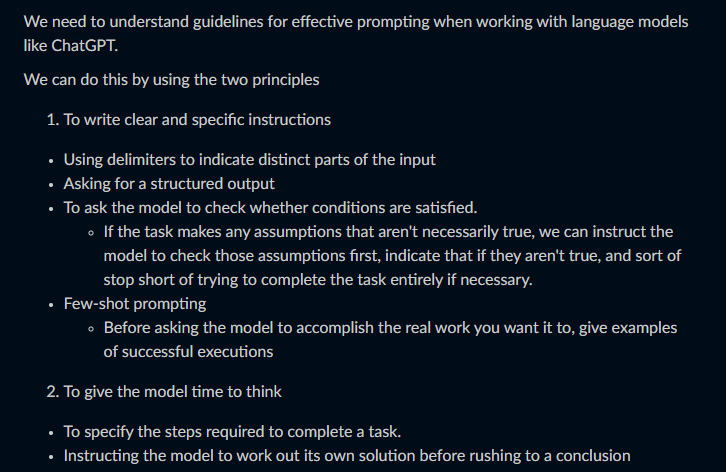

In [ ]:
import openai
from dotenv import load_dotenv
import os

load_dotenv('/content/file.env')
openai.api_key = os.environ.get('OPENAI_API_KEY')

In [ ]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0,
    )
    return response.choices[0].message["content"]


get_completion('complete the sentence - humpty dumpty sat on a..')

'wall'

In [ ]:
text_to_get_topics_1 = f"""The computer consists of a keyboard, mouse and a display. The rest of the accessories should be purchased separately."""

prompt = f"""
Given a text delimited by triple quotes. check If it contains texts based on computer, output the topics in the following format:

Topics - ...

If the text does not contain toics based on computer, then simply write \"No Topics on Computer.\"

\"\"\"{text_to_get_topics_1}\"\"\"
"""

In [ ]:
print(get_completion(prompt))

Topics - computer, keyboard, mouse, display, accessories


In [ ]:
fact_sheet_computer = """
OVERVIEW
- A computer targeted at gamers

HARDWARE
- Ryzen 5 processor
- 16 GB RAM
- Liquid cooling
- 1 TB SSD

SOFTWARE
- Windows
- Antivirus software
- RGB controller

ACCESSORIES
- 4k Display
- RGB keyboard and mouse
"""

prompt = f"""
You are an Ad Writer. Your task is to write a catchy ad based on the specifications
provided in the technical factsheet . the information for technical specifications is delimited by triple backticks.

Format everything as HTML that can be used in a website.
Place the description in a <div> element.

Technical specifications: ```{fact_sheet_computer}```
"""

response = get_completion(prompt)
print(response)

<div>

    <h2>Unleash Your Gaming Potential with the Ultimate Gaming Computer!</h2>

    <p>Are you a serious gamer looking for a computer that can keep up with your skills? Look no further! Our gaming computer is specifically designed for gamers like you.</p>

    

    <h3>Technical Specifications:</h3>

    <ul>

        <li><strong>Processor:</strong> Ryzen 5</li>

        <li><strong>RAM:</strong> 16 GB</li>

        <li><strong>Cooling:</strong> Liquid cooling system</li>

        <li><strong>Storage:</strong> 1 TB SSD</li>

        <li><strong>Operating System:</strong> Windows</li>

        <li><strong>Security:</strong> Antivirus software included</li>

        <li><strong>RGB:</strong> Customizable RGB controller</li>

        <li><strong>Display:</strong> 4k display for stunning visuals</li>

        <li><strong>Accessories:</strong> RGB keyboard and mouse for a complete gaming setup</li>

    </ul>

    

    <p>Don't settle for anything less than the best when it comes to

Following format of ads are rendered based on HTML response generated through above prompts

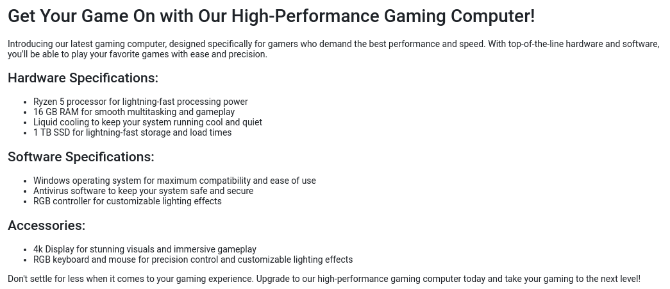

In order to get this kind of response from the model, the prompt we provide to the model must be continuously improved and it is not a one shot solution.

# Summarizing

Summarizing is the process to summarize text, which can be useful for quickly glancing over a large volume of text.

We can use Large Language Model to summarize for a given a large amount of text.

**Summarizing with word/sentence/character limit**

In [ ]:
prod_review = """
I recently purchased a 10-pack of Amazon Basics AA High-Performance Alkaline Batteries, and I'm very happy with them. They arrived quickly with free shipping for Prime members, and they've been working great in all of my devices. I've been using them in my remote controls, flashlights, and toys, and they've all been lasting a long time. I'm impressed with the quality of these batteries, and I would definitely recommend them to others. They're a great value for the price, and they're reliable and long-lasting. I'm glad I made the switch to Amazon Basics batteries.
"""

prompt = f"""
Your task is to generate a short summary of a product review from an ecommerce site.

Summarize the review below, delimited by triple
backticks, in exactly 10 words.

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

Great value, reliable, long-lasting batteries for various devices. Highly recommended.


**Summarizing with a focus on keywords**

In [ ]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site to give feedback to the \
Shipping department.

Summarize the review below, delimited by triple
backticks, into exactly 3 sentences, and focusing on any aspects \
that mention shipping and delivery of the product.

Review: ```{prod_review}```
"""
response = get_completion(prompt)
print(response)

# Here, we are modifying our prompt to generate a different response from the model, depending on our specific requirement.
# We are asking the model to modify the summary so that it is relevant to the 'Shipping department'.

The customer was pleased with the quick delivery of the Amazon Basics AA High-Performance Alkaline Batteries, especially with the free shipping for Prime members. They have found the batteries to be reliable and long-lasting, working well in various devices such as remote controls, flashlights, and toys. Overall, the customer highly recommends these batteries for their quality, value, and performance.


**Extracting instead of Summarizing**

In [ ]:
# In this example we will replace the word 'summarize' with 'extract' inside the prompt and see how the output varies.

prompt = f"""
Your task is to extract relevant information from \
a product review from an ecommerce site to give \
feedback to the Pricing department.

From the review below, delimited by triple quotes \
extract the information relevant to price and \
value. Limit to 30 words.

Review: ```{prod_review}```
"""
response = get_completion(prompt)
print(response)

Feedback: Customer is satisfied with the value of the 10-pack of Amazon Basics AA batteries, mentioning they are a great value for the price, reliable, and long-lasting.


**Summarizing multiple product reviews**

In [ ]:
review_1 = prod_review

review_2 = """
The Apple AirPods Pro are excellent wireless earbuds with great sound quality, comfort, and battery life. \
They also feature active noise cancellation, which is perfect for blocking out distractions. \
I highly recommend these AirPods to anyone looking for a great pair of wireless earbuds. \
They sound great, are comfortable to wear, and have great battery life. \
I especially appreciate the noise cancellation feature, which is perfect for blocking out distractions \
when I'm working or commuting. Overall, I highly recommend the Apple AirPods Pro. They are a great pair \
of wireless earbuds with excellent features and performance. They are a bit pricey, but I think they are \
worth the investment.
"""

review_3 = """
I recently ordered a pair of shoes from Amazon. The shoes were delivered \
in two days, which was much faster than the estimated delivery date of 5-7 days. \
They were also well-packaged and in perfect condition. The shoes were priced \
at $50, which I thought was a fair price for the quality of the product. Overall, \
I was very happy with my purchase and would definitely recommend Amazon to others.
"""

review_4 = """
I recently ordered a coffee maker from Walmart. I was looking for a simple, \
affordable coffee maker that would make a good cup of coffee. I found the \
Black & Decker 4-cup coffee maker for $40.The coffee maker \
will brew a pot of coffee in about five minutes. The coffee is hot and \
flavorful. I have been very happy with the coffee maker. It is a great \
value for the price. I would definitely recommend this coffee maker to \
others. It is a great option for people who are looking for a simple, \
affordable coffee maker that makes a good cup of coffee.
"""


def summarize_reviews(reviews):
    for i in range(len(reviews)):
        prompt = f"""
        Your task is to generate a short summary of a product \
        review from an ecommerce site.

        Summarize the review below, delimited by triple \
        backticks in exactly {reviews[i][1]} words.

        Review: ```{reviews[i][0]}```
        """
        response = get_completion(prompt)
        print(i+1,': ',response)

reviews = [(review_1,10), (review_2,20), (review_3,30), (review_4,40)]
summarize_reviews(reviews)

1 :  Great value, reliable, long-lasting Amazon Basics AA batteries for all devices.

2 :  "Apple AirPods Pro offer excellent sound quality, comfort, and battery life with active noise cancellation. Highly recommended despite the price."

3 :  The reviewer was pleased with their Amazon shoe purchase, as they arrived quickly, well-packaged, and in perfect condition. They found the $50 price fair for the quality and would recommend Amazon.

4 :  "The Black & Decker 4-cup coffee maker from Walmart is a great value at $40. It brews coffee quickly, producing hot and flavorful results. Highly recommended for those seeking a simple and affordable option that delivers a good cup of coffee."


# Inferring

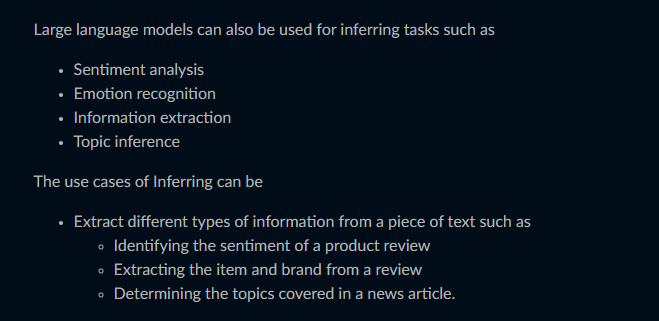

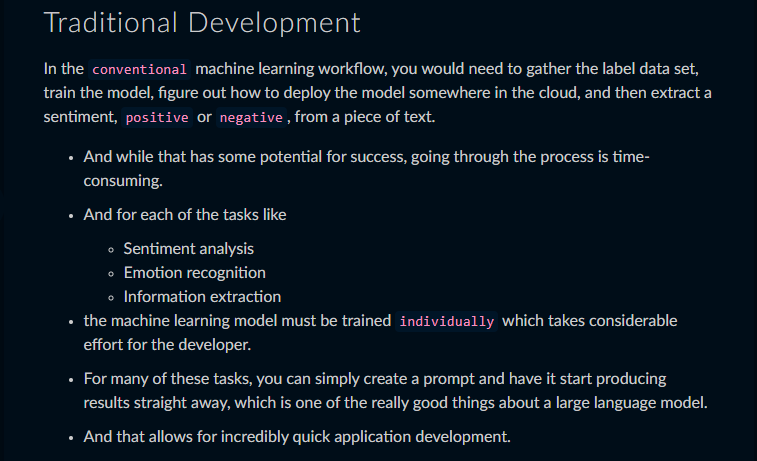

**Sentiment Analysis**

In [ ]:
prompt = f"""
What is the sentiment of the following product review,
which is delimited with triple backticks?

Give your answer as a single word, either "positive" \
or "negative".

Review text: '''{prod_review}'''
"""
response = get_completion(prompt)
print(response)

positive


**Identify types of emotions**

In [ ]:
prompt = f"""
Identify a list of emotions that the writer of the following review is expressing. Include no more than five items in the list. Format your answer as a list of lower-case words separated by commas.

Review text: '''{prod_review}'''
"""

response = get_completion(prompt)
print(response)

happy, impressed, recommend, glad, reliable


**Extracting keywords**

In [ ]:
prompt = f"""
Identify the following items from the review text:
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Item" and "Brand" as the keys.
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.

Review text: '''{prod_review}'''
"""
response = get_completion(prompt)
print(response)

{

  "Item": "10-pack of Amazon Basics AA High-Performance Alkaline Batteries",

  "Brand": "Amazon Basics"

}


**Inferring topics**

In [ ]:
story = """
Facebook CEO Mark Zuckerberg announced a major tech update today, \
including new features for the company's flagship social media platform, \
as well as investments in augmented reality and virtual reality. \

One of the most notable new features is the introduction of "Groups". \
Groups will allow users to create private communities around shared interests, \
such as hobbies, sports, or causes. Groups will have their own news feeds, \
where users can post updates, photos, and videos. They will also have their \
own chat rooms, where users can communicate with each other in real time. \

Another new feature is the introduction of "Live Audio Rooms". \
Live Audio Rooms will allow users to host live audio conversations \
with their friends, family, and followers. Users will be able to \
listen to and participate in conversations, as well as ask questions \
and share their own thoughts.

In addition to the new features for Facebook, Zuckerberg also announced \
investments in augmented reality (AR) and virtual reality (VR). Facebook \
is developing a new AR platform called "Project Aria", which will be used \
to develop AR glasses and other AR devices. The company is also developing \
a new VR headset called "Project Cambria", which is designed for enterprise use.

The announcement was met with mixed reactions from the tech community. \
Some people praised Facebook for its innovation, while others criticized \
the company for its focus on profit over privacy. Only time will tell whether \
Facebook's major tech update will be a success. However, it is clear that the \
company is ambitious and is looking to the future.
"""

prompt = f"""
Determine five topics that are being discussed in the \
following text, which is delimited by triple backticks.

Make each item one or two words long.

Format your response as a list of items separated by commas.

Text sample: '''{story}'''
"""
response = get_completion(prompt)
print(response)

1. Facebook

2. Tech update

3. Augmented reality

4. Virtual reality

5. Privacy


# Transforming

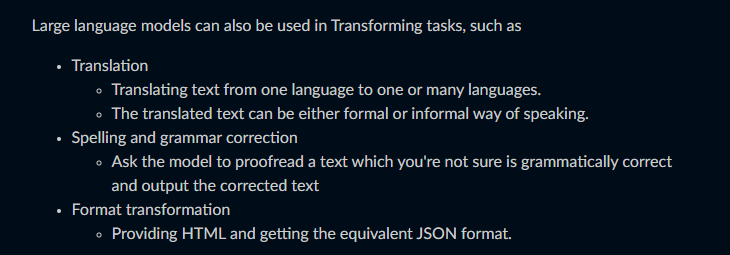

**Translation**

In [ ]:
translate_text = """
The sun rises in the east.
"""

prompt = f"""
Your task is to translate the given english text to spanish.

Give the translation in the following format
Spanish: ...

Text: ```{translate_text}```
"""

response = get_completion(prompt)
print(response)

Spanish: El sol sale por el este.


**Format Conversion**

In [ ]:
data_xml = """
<students>
  <student>
    <student_no>001</student_no>
    <student_name>John Doe</student_name>
    <class>10A</class>
  </student>
  <student>
    <student_no>002</student_no>
    <student_name>Jane Smith</student_name>
    <class>10B</class>
  </student>
  <student>
    <student_no>003</student_no>
    <student_name>Bob Johnson</student_name>
    <class>10A</class>
  </student>
</students>
"""

prompt = f"""
Translate the following string from XML to JSON : {data_xml}
"""
response = get_completion(prompt)
print(response)

{

  "students": {

    "student": [

      {

        "student_no": "001",

        "student_name": "John Doe",

        "class": "10A"

      },

      {

        "student_no": "002",

        "student_name": "Jane Smith",

        "class": "10B"

      },

      {

        "student_no": "003",

        "student_name": "Bob Johnson",

        "class": "10A"

      }

    ]

  }

}


**Spellcheck/Grammar check and Tone Transformation**

In [ ]:
convert_text = """
See if you csn finish that an hour.
"""

prompt = f"""
Your task is to find Proofread and correct the given text and then convert the \
proofread text to a business slang.

Give the output in the following format
Proofread text: ...
Business text: ...

Text: ```{convert_text}```
"""
response = get_completion(prompt)
print(response)

Proofread text: See if you can finish that in an hour.

Business text: Let's see if you can wrap that up in an hour.


# Expanding

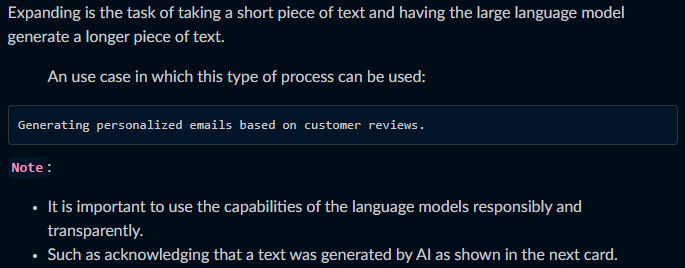

**Story Writing**

In [ ]:
sentiment = "funny"
snippet = "A dog and cat are playing"

prompt = f"""
You are a story writer.
Your task is to write a story based on a snippet that is provided.
Given the snippet delimited by ```, The story can be funny or sad based on the sentiment provided. The story should be no more than 50 words.
snippet: ```{snippet}```
sentiment: {sentiment}
"""

response = get_completion(prompt)
print(response)

The dog and cat were playing together when suddenly the cat pounced on the dog's tail. The dog yelped in surprise and chased the cat around the room, but the cat was too quick. They ended up tangled in a hilarious mess of fur and laughter.
